In [27]:
import numpy as np
import pandas as pd
import scipy as sp
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tqdm import tqdm
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

In [121]:
# Global variables for plotting.
mpl.rcParams.update({'font.size': 14, 'figure.figsize': (12,8)})
# pink_palette = ['#FC4993', '#70D6FF']
# pink_pallette_rgba = [(252, 73, 147, 1), (112, 214, 255, 1)]

In [122]:
df_email = pd.read_csv('./Customer Cliff Dive Data Set/yammer_emails.csv')
df_ev1 = pd.read_csv('./Customer Cliff Dive Data Set/yammer_events_1.csv')
df_ev2 = pd.read_csv('./Customer Cliff Dive Data Set/yammer_events_2.csv')
df_user = pd.read_csv('./Customer Cliff Dive Data Set/yammer_users.csv')
print('Dimension of the email dataset: {}'.format(np.shape(df_email)))
print('Dimension of the event1 dataset: {}'.format(np.shape(df_ev1)))
print('Dimension of the event2 dataset: {}'.format(np.shape(df_ev2)))
print('Dimension of the user dataset: {}'.format(np.shape(df_user)))

Dimension of the email dataset: (90389, 4)
Dimension of the event1 dataset: (170416, 8)
Dimension of the event2 dataset: (170416, 8)
Dimension of the user dataset: (19066, 6)


## Events dataset

In [159]:
events = [df_ev1,df_ev2]
df_ev = pd.concat(events,axis=0,ignore_index=True)
# df_ev.head()

In [160]:
df_ev.dtypes

Unnamed: 0       int64
user_id        float64
occurred_at     object
event_type      object
event_name      object
location        object
device          object
user_type      float64
dtype: object

In [161]:
df_ev['occurred_at'] = pd.to_datetime(df_ev['occurred_at'])#[datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in df_ev.occurred_at.values]
df_ev.sort_values(by='occurred_at',ascending=True,inplace=True)
df_ev.reset_index(drop=True,inplace=True)
df_ev['weekly'] = df_ev['occurred_at'].dt.week

In [142]:
df_ev.tail()

,Unnamed: 0,user_id,occurred_at,event_type,event_name,location,device,user_type,weekly
340827,340811,18809.0,2014-08-31 23:01:46,engagement,like_message,Pakistan,dell inspiron notebook,3.0,35
340828,340813,18809.0,2014-08-31 23:02:05,engagement,search_autocomplete,Pakistan,dell inspiron notebook,3.0,35
340829,340814,18809.0,2014-08-31 23:02:31,engagement,search_autocomplete,Pakistan,dell inspiron notebook,3.0,35
340830,340815,18809.0,2014-08-31 23:03:13,engagement,search_autocomplete,Pakistan,dell inspiron notebook,3.0,35
340831,340816,18809.0,2014-08-31 23:03:39,engagement,search_autocomplete,Pakistan,dell inspiron notebook,3.0,35


# User Type 1 df

In [264]:
u1_ev = df_ev.query('user_type == 1.0')

In [195]:
def scr(x):
    if x.find('search_click_result')==0:
        return "search_click_result"
    else:
        return x

In [200]:
df_ev.event_name=df_ev.event_name.apply(scr);

In [201]:
df_ev.event_name.unique()

array(['create_user', 'login', 'home_page', 'view_inbox', 'send_message',
       'like_message', 'search_run', 'search_click_result',
       'search_autocomplete', 'enter_email', 'enter_info',
       'complete_signup'], dtype=object)

In [202]:
df_ev.event_type.unique()

array(['signup_flow', 'engagement'], dtype=object)

In [203]:
df_ev.location.unique()

array(['United Kingdom', 'India', 'Philippines', 'Hong Kong', 'Canada',
       'Indonesia', 'Japan', 'Sweden', 'United States', 'Poland',
       'Australia', 'Italy', 'Norway', 'Singapore', 'Nigeria', 'Spain',
       'France', 'Colombia', 'Egypt', 'Finland', 'Mexico', 'Russia',
       'Iran', 'Venezuela', 'Turkey', 'Germany', 'Denmark', 'Brazil',
       'Taiwan', 'Belgium', 'Malaysia', 'Pakistan', 'Iraq',
       'United Arab Emirates', 'Netherlands', 'Korea', 'Saudi Arabia',
       'Ireland', 'Israel', 'Chile', 'Thailand', 'Austria', 'Greece',
       'Argentina', 'Switzerland', 'Portugal', 'South Africa'],
      dtype=object)

In [204]:
df_ev.user_type.fillna(0, inplace=True);

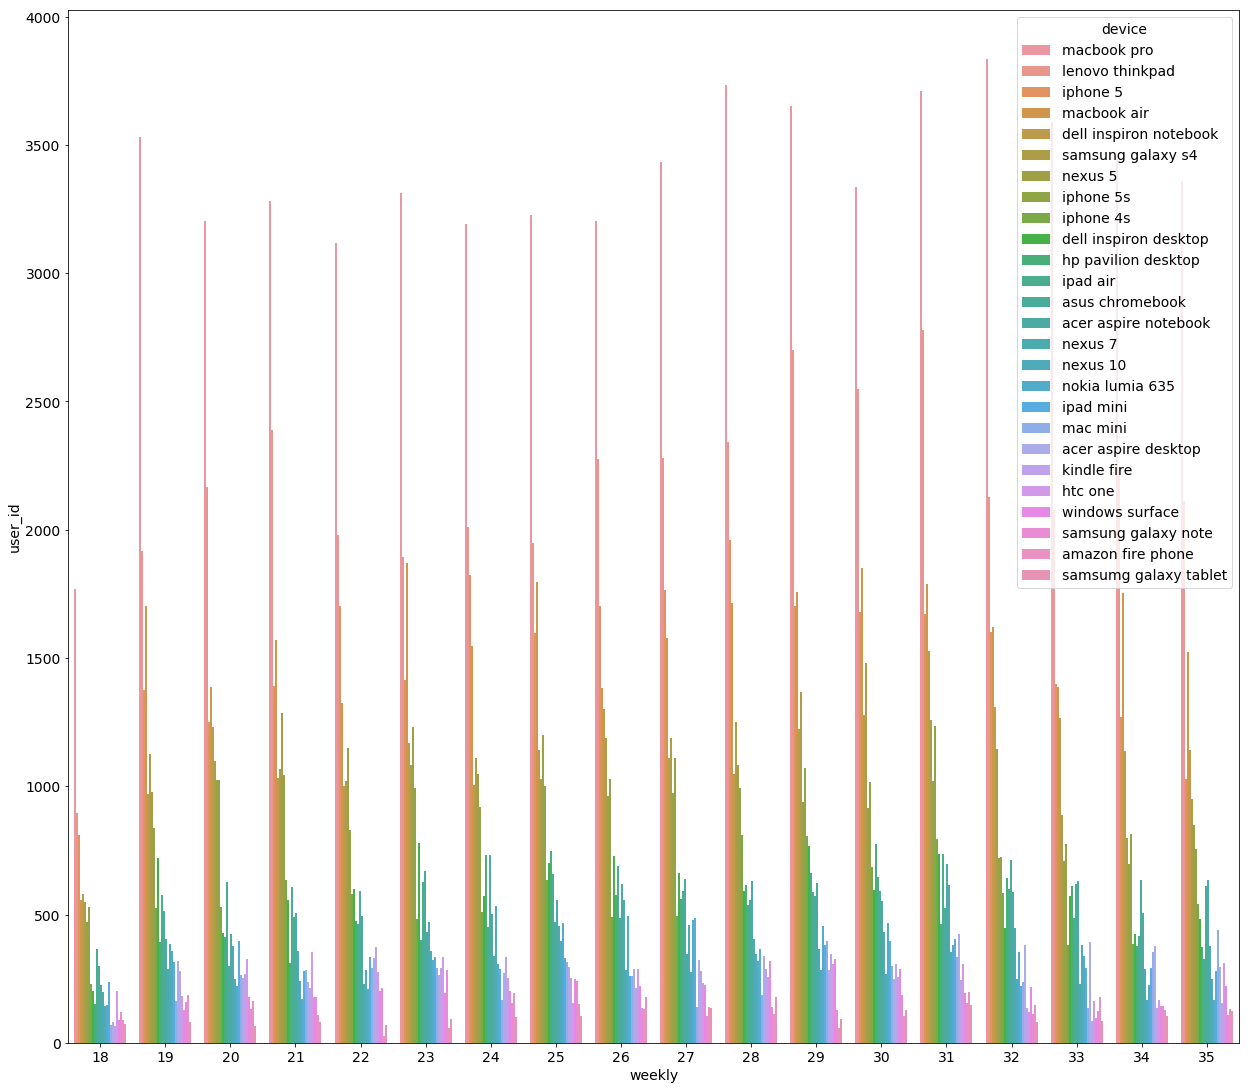

In [258]:
# Monthly count of user in different device after July
d1=pd.DataFrame(df_ev.query('occurred_at < \'2014-11-30 23:01:46\'').groupby(['device','weekly'], as_index=False)['user_id'].count()).sort_values('user_id',ascending=False)
fig, ax = plt.subplots(figsize=(21,19))
ax = sns.barplot(y='user_id', x="weekly",hue='device', data=d1)



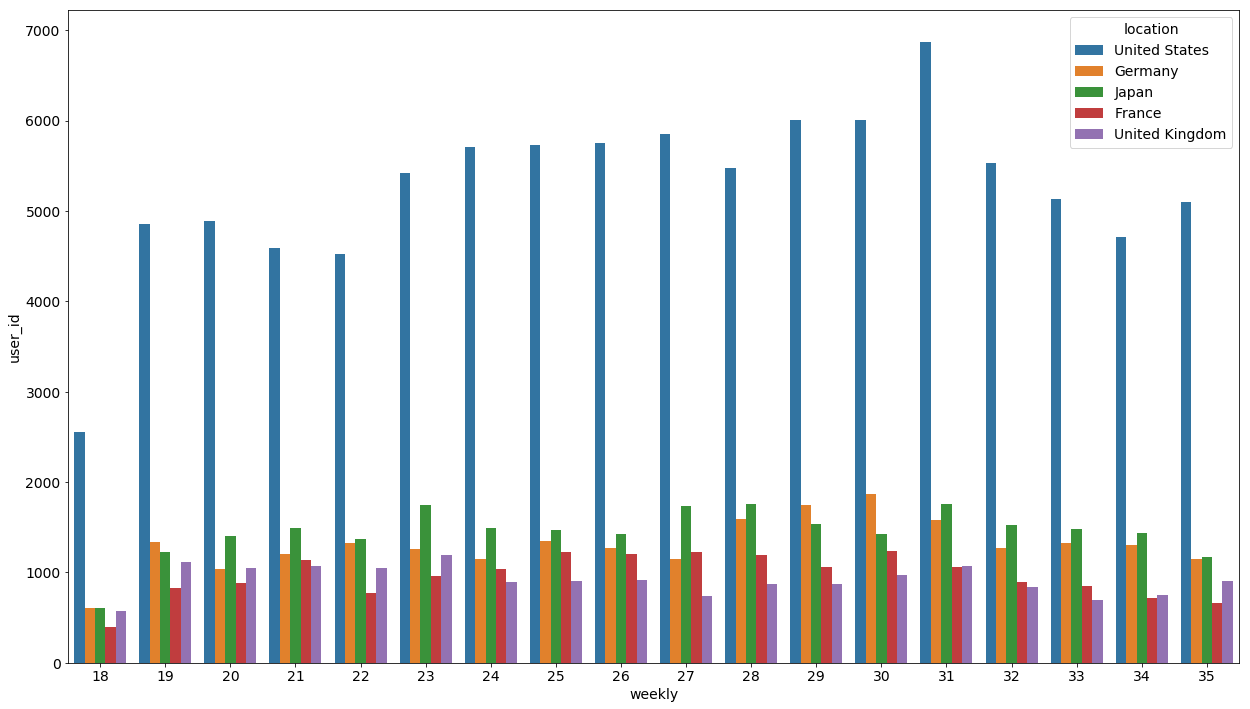

In [255]:
# User by location
d1=pd.DataFrame(df_ev.query('occurred_at < \'2014-11-01 23:59:59\' and location in [\'United States\',\'Japan\',\'Germany\',\'France\',\'United Kingdom\']').groupby(['location','weekly'], as_index=False)['user_id'].count()).sort_values('user_id',ascending=False)
fig, ax = plt.subplots(figsize=(21,12))
ax = sns.barplot(y='user_id', x="weekly",hue='location', data=d1)


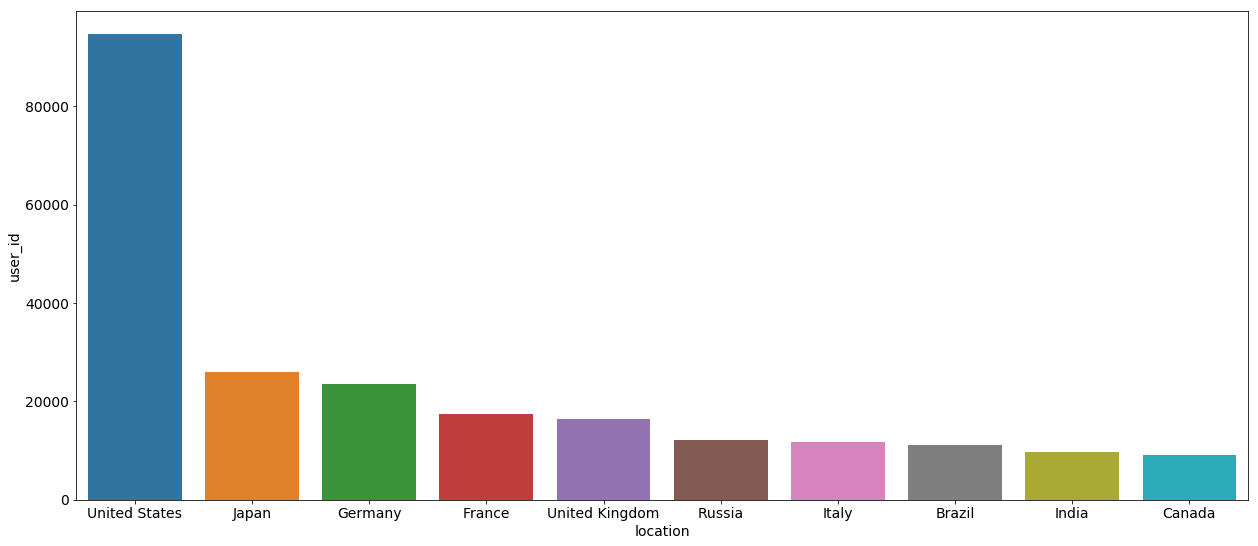

In [257]:
# Monthly count of user in different location after July
d1=pd.DataFrame(df_ev.query('occurred_at < \'2014-11-30 23:01:46\'').groupby(['location'], as_index=False)['user_id'].count()).sort_values('user_id',ascending=False)[:10]
fig, ax = plt.subplots(figsize=(21,9))
ax = sns.barplot(y='user_id', x="location", data=d1)

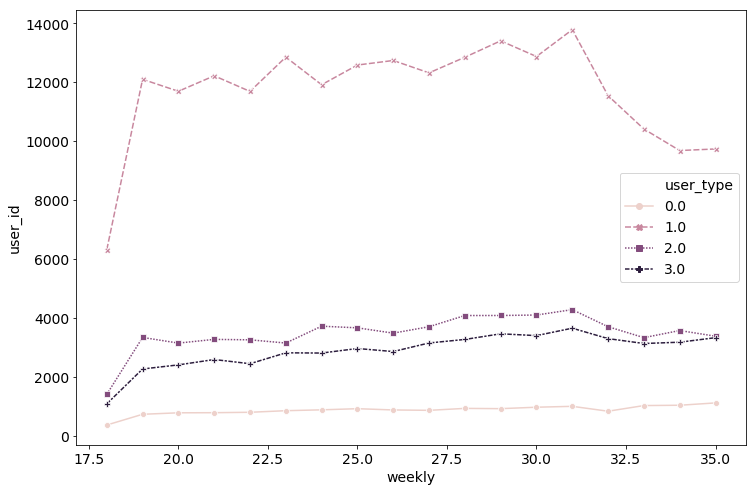

In [206]:
# Monthly count of user type
d1=pd.DataFrame(df_ev.groupby(['weekly','user_type'], as_index=False)['user_id'].count())
# fig, ax = plt.subplots(figsize=(21,6))
ax = sns.lineplot(x='weekly', y="user_id", hue="user_type", style='user_type',data=d1, markers=True)

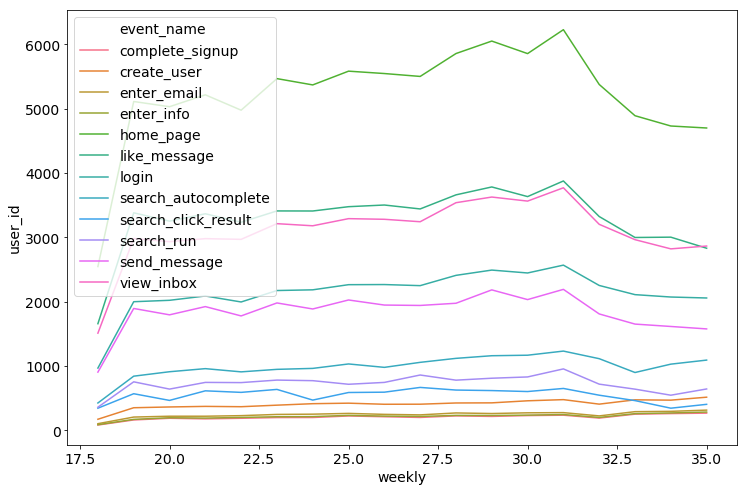

In [209]:
# Monthly count of different event name
d1=pd.DataFrame(df_ev.groupby(['weekly','event_name'], as_index=False)['user_id'].count())
ax = sns.lineplot(x='weekly', y="user_id", hue="event_name",data=d1, markers=True, legend='brief')

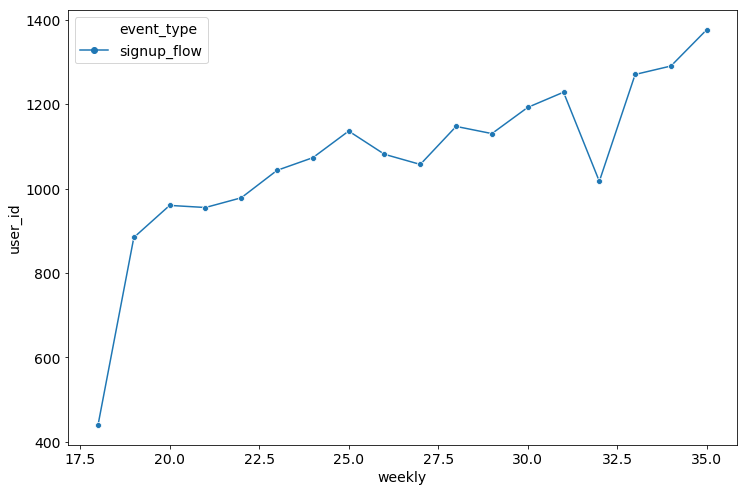

In [300]:
# Change in monthly event of two types
d1=pd.DataFrame(df_ev.groupby(['weekly','event_type'], as_index=False)['user_id'].count())
# fig, ax = plt.subplots(figsize=(21,6))
ax = sns.lineplot(x='weekly', y="user_id", hue="event_type", style='event_type',data=d1.query('event_type == \'signup_flow\''), markers=True)

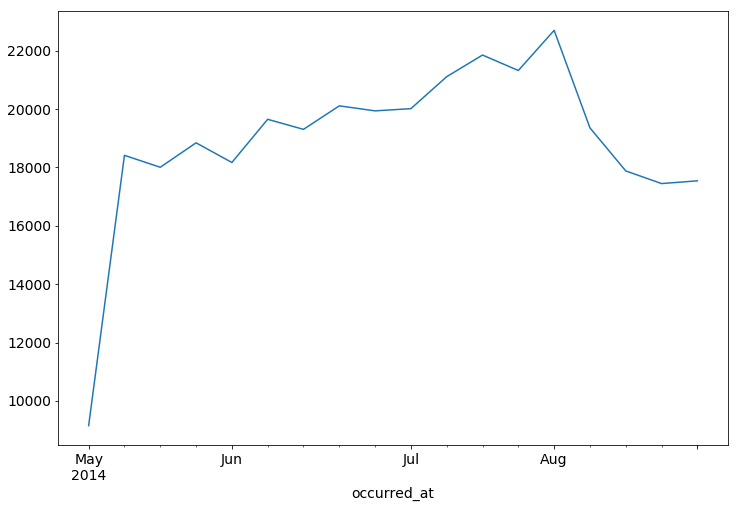

In [113]:
# Number of weekly user activity
df_ev.reset_index().set_index('occurred_at').user_id.resample('W').count().plot()

## Email dataset

In [260]:
df_email['occurred_at'] = pd.to_datetime(df_email['occurred_at'])#[datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in df_ev.occurred_at.values]
df_email.sort_values(by='occurred_at',ascending=True,inplace=True)
df_email.reset_index(drop=True,inplace=True)
df_email['weekly'] = df_email['occurred_at'].dt.week
df_email.head()

,user_id,occurred_at,action,user_type,weekly
0,11569.0,2014-05-01 09:28:25,sent_reengagement_email,3.0,18
1,6145.0,2014-05-01 09:30:00,sent_weekly_digest,3.0,18
2,5548.0,2014-05-01 09:30:00,sent_weekly_digest,3.0,18
3,5546.0,2014-05-01 09:30:00,sent_weekly_digest,1.0,18
4,823.0,2014-05-01 09:30:00,sent_weekly_digest,3.0,18


In [261]:
df_email.action.unique()

array(['sent_reengagement_email', 'sent_weekly_digest', 'email_open',
       'email_clickthrough'], dtype=object)

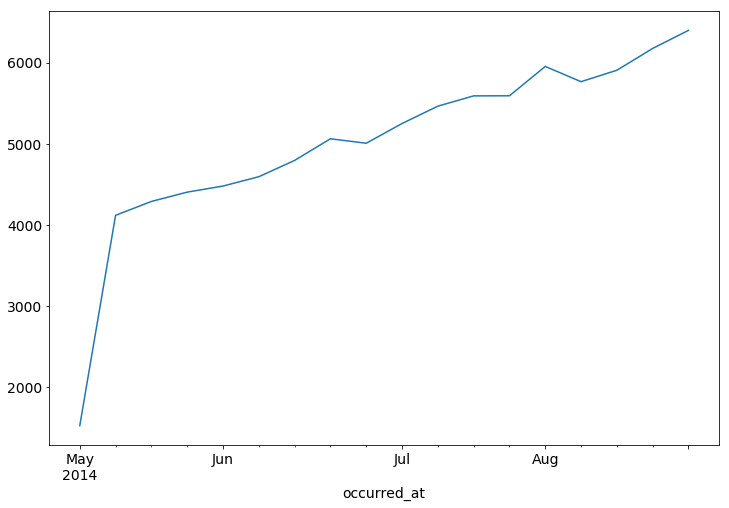

In [262]:
# Monthly email count
df_email.reset_index().set_index('occurred_at').user_id.resample('W').count().plot()

## User dataset

In [15]:
df_user['created_at'] = pd.to_datetime(df_user['created_at'])#[datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in df_ev.occurred_at.values]
df_user['activated_at'] = pd.to_datetime(df_user['activated_at'])
df_user.sort_values(by='created_at',ascending=True,inplace=True)
df_user.reset_index(drop=True,inplace=True)
df_user['create_weekly'] = df_user['created_at'].dt.week
df_user.tail()

,user_id,created_at,company_id,language,activated_at,state
19061,19061.0,2014-08-31 13:21:16,2156.0,chinese,2014-08-31 13:22:50,active
19062,19062.0,2014-08-31 19:21:23,7520.0,spanish,NaN,pending
19063,19063.0,2014-08-31 07:10:41,72.0,spanish,2014-08-31 07:12:09,active
19064,19064.0,2014-08-31 17:45:18,2.0,english,NaN,pending
19065,19065.0,2014-08-31 19:29:19,8352.0,italian,NaN,pending


In [17]:
print('Number of unique users in the User dataset: {}'.format(len(df_user.user_id.unique())))
print('Number of unique users in the event dataset: {}'.format(len(df_ev.user_id.unique())))
print('Number of unique users in the email dataset: {}'.format(len(df_email.user_id.unique())))

Number of unique users in the User dataset: 19066
Number of unique users in the event dataset: 9760
Number of unique users in the email dataset: 6179


## Inner join u1_ev & df_user

In [279]:
u1 = pd.merge(df_user,u1_ev, how='inner', on=['user_id'])

In [280]:
u1.head()

,user_id,created_at,company_id,language,activated_at,state,Unnamed: 0,occurred_at,event_type,event_name,location,device,user_type,weekly
0,11.0,2013-01-01 08:07:45,3745.0,english,2013-01-01 08:09:17,active,51711,2014-06-17 09:31:22,engagement,login,United States,iphone 4s,1.0,25
1,11.0,2013-01-01 08:07:45,3745.0,english,2013-01-01 08:09:17,active,51720,2014-06-17 09:31:48,engagement,search_autocomplete,United States,iphone 4s,1.0,25
2,11.0,2013-01-01 08:07:45,3745.0,english,2013-01-01 08:09:17,active,51712,2014-06-17 09:31:53,engagement,like_message,United States,iphone 4s,1.0,25
3,11.0,2013-01-01 08:07:45,3745.0,english,2013-01-01 08:09:17,active,51713,2014-06-17 09:32:18,engagement,view_inbox,United States,iphone 4s,1.0,25
4,11.0,2013-01-01 08:07:45,3745.0,english,2013-01-01 08:09:17,active,51714,2014-06-17 09:32:54,engagement,home_page,United States,iphone 4s,1.0,25


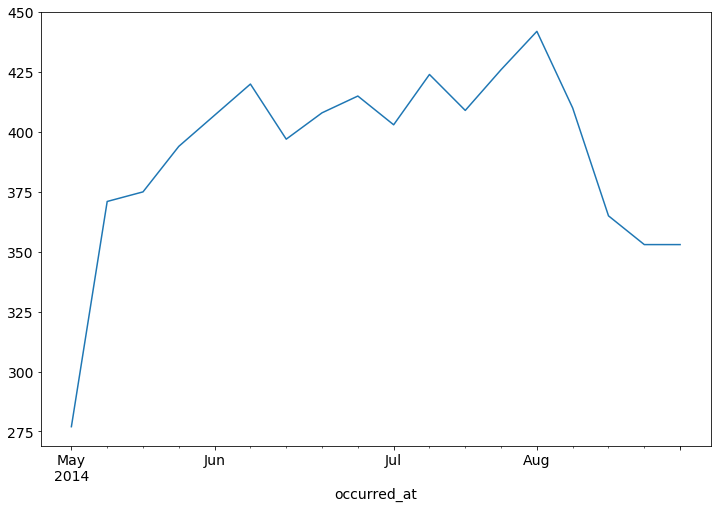

In [286]:
u1.reset_index().set_index('occurred_at').company_id.resample('W').nunique().plot()

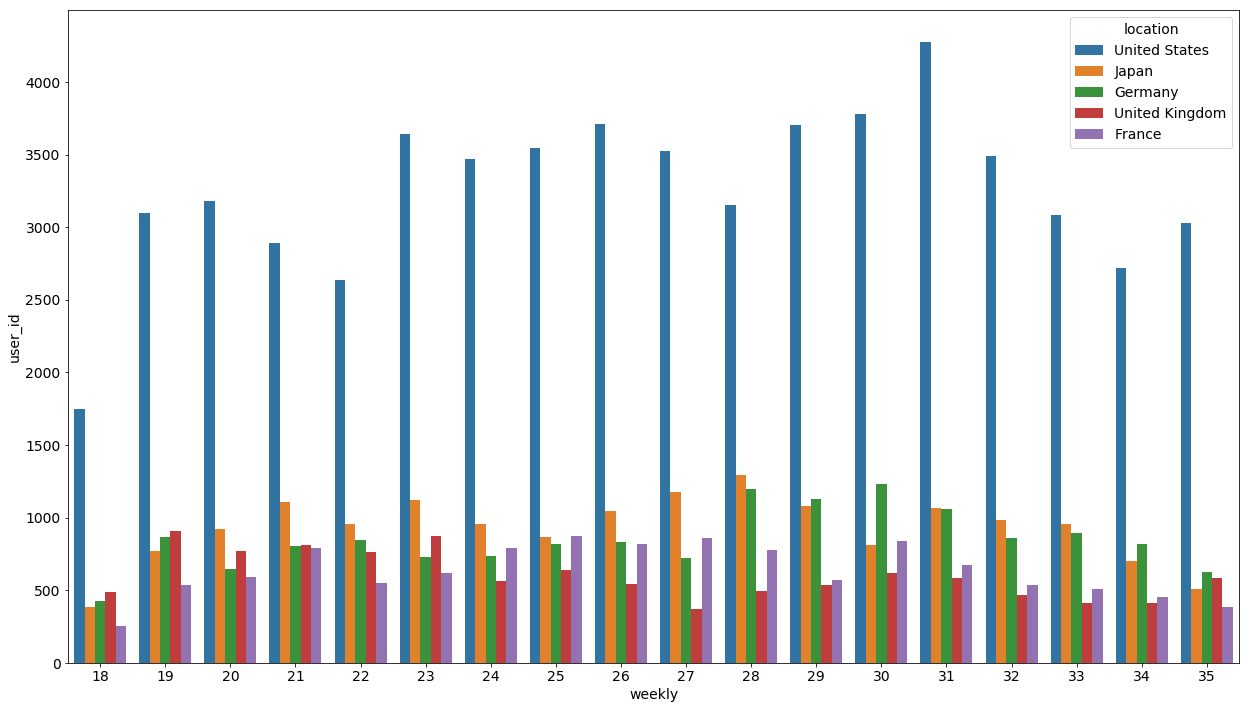

In [287]:
# User by location
d1=pd.DataFrame(u1.query('occurred_at < \'2014-11-01 23:59:59\' and location in [\'United States\',\'Japan\',\'Germany\',\'France\',\'United Kingdom\']').groupby(['location','weekly'], as_index=False)['user_id'].count()).sort_values('user_id',ascending=False)
fig, ax = plt.subplots(figsize=(21,12))
ax = sns.barplot(y='user_id', x="weekly",hue='location', data=d1)

In [298]:
u1.query('weekly <= 31').company_id.nunique()

1181

In [292]:
# # User by location
# d1=pd.DataFrame(u1.query('occurred_at < \'2014-11-01 23:59:59\' and location in [\'United States\',\'Japan\',\'Germany\',\'France\',\'United Kingdom\']').groupby(['company_id','weekly'], as_index=False)['user_id'].count()).sort_values('user_id',ascending=False)
# fig, ax = plt.subplots(figsize=(21,12))
# ax = sns.barplot(y='user_id', x="weekly",hue='company_id', data=d1)